In [1]:
import sys
# my_framework_path = '/home/wmpjrufg/Documents/metapy' # PC prof. wanderlei at umn
# my_framework_path = r'C:\git-projetos\metapy' # PC prof. wanderlei
my_framework_path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\metapy' # PC do rezio
sys.path.append(my_framework_path)
from metapy_toolbox import *

In [2]:
import traceback
from pprint import pprint

# Simple test objective (sphere)
def obj(x, args=None):
    # x is list-like
    return sum([xi ** 2 for xi in x])

# Small initial population (4 individuals) and bounds for d=3
d = 3
initial_population = [
    [0.1, 0.2, -0.1],
    [0.5, -0.3, 0.4],
    [-0.2, 0.6, -0.5],
    [0.0, 0.0, 0.0],
]
x_lower = [-1.0] * d
x_upper = [1.0] * d

# We'll run only 1 generation to speed tests
n_gen = 1

# selection fixed to roulette wheel (genetic_algorithm_01 expects many spellings; use canonical)
selection_type = 'roulette wheel'

# Crossover types to test (a variety of names / spellings)
crossover_types = [
    'linear',
    'blx-alpha',
    'blxalpha',
    'heuristic',
    'simulated_binary',
    'arithmetic',
    'laplace',
    'uniform',
    'binomial',
]

# Mutation: set to 'random walk' but with 0% mutation rate so it won't modify population;
# this avoids undefined report_mutation because genetic_algorithm_01 expects that branch.
mutation_type = 'random walk'
mutation_params = {
    'pdf': 'uniform',
    'cov (%)': 0.0
}

results = {}

for ctype in crossover_types:
    params = {
        'selection': selection_type,
        'crossover': {
            'type': ctype,
            # set 100% crossover rate so we attempt to perform the crossover
            'crossover rate (%)': 100.0,
        },
        'mutation': {
            'type': mutation_type,
            'mutation rate (%)': 0.0,  # no actual mutation performed
            'params': mutation_params
        }
    }

    try:
        df_all, df_resume, report = genetic_algorithm_01(
            obj=obj,
            n_gen=n_gen,
            params=params,
            initial_population=initial_population,
            x_lower=x_lower,
            x_upper=x_upper,
            args=None,
            robustness=False
        )
        results[ctype] = {
            'status': 'success',
            'report_excerpt': (report[:100] + '...') if report else '',
            'df_shape': (df_all.shape, df_resume.shape)
        }
        print(f"[OK] crossover='{ctype}' completed. df_all shape={df_all.shape}, df_resume shape={df_resume.shape}")

    except Exception as e:
        tb = traceback.format_exc()
        results[ctype] = {
            'status': 'error',
            'error': str(e),
            'traceback': tb
        }
        print(f"[ERR] crossover='{ctype}' raised an exception: {e}")

# Print compact summary
print("\n=== Test summary ===")
pprint(results)

[OK] crossover='linear' completed. df_all shape=(8, 14), df_resume shape=(2, 15)
[OK] crossover='blx-alpha' completed. df_all shape=(8, 14), df_resume shape=(2, 15)
[OK] crossover='blxalpha' completed. df_all shape=(8, 14), df_resume shape=(2, 15)
[OK] crossover='heuristic' completed. df_all shape=(8, 14), df_resume shape=(2, 15)
[OK] crossover='simulated_binary' completed. df_all shape=(8, 14), df_resume shape=(2, 15)
[OK] crossover='arithmetic' completed. df_all shape=(8, 14), df_resume shape=(2, 15)
[OK] crossover='laplace' completed. df_all shape=(8, 14), df_resume shape=(2, 15)
[OK] crossover='uniform' completed. df_all shape=(8, 14), df_resume shape=(2, 15)
[OK] crossover='binomial' completed. df_all shape=(8, 14), df_resume shape=(2, 15)

=== Test summary ===
{'arithmetic': {'df_shape': ((8, 14), (2, 15)),
                'report_excerpt': 'Genetic Algorithm\n'
                                  'iteration: 1\n'
                                  ' Agent id: 0\n'
                 

Initial Population (Opposite):
[[2.22604395 6.56112156]
 [9.14140208 3.30263197]
 [0.90582265 8.02437765]
 [8.2388603  2.21393569]
 [4.87188637 9.54961406]
 [1.62920198 5.07323501]
 [6.35613488 1.17723839]
 [7.5565858  7.77276128]
 [3.44541521 4.93618274]
 [5.17236883 0.3683356 ]]
Opposite Population:
[[7.77395605 3.43887844]
 [0.85859792 6.69736803]
 [9.09417735 1.97562235]
 [1.7611397  7.78606431]
 [5.12811363 0.45038594]
 [8.37079802 4.92676499]
 [3.64386512 8.82276161]
 [2.4434142  2.22723872]
 [6.55458479 5.06381726]
 [4.82763117 9.6316644 ]]

Initial Population (Quasi-Opposite):
[[2.22604395 6.56112156]
 [9.14140208 3.30263197]
 [0.90582265 8.02437765]
 [8.2388603  2.21393569]
 [4.87188637 9.54961406]
 [1.62920198 5.07323501]
 [6.35613488 1.17723839]
 [7.5565858  7.77276128]
 [3.44541521 4.93618274]
 [5.17236883 0.3683356 ]]
Quasi-Opposite Population:
[[7.14692006 4.12402103]
 [4.41439713 6.1836902 ]
 [5.38557876 4.92627279]
 [4.22636486 7.1900257 ]
 [5.0164131  2.49946813]
 [6.2

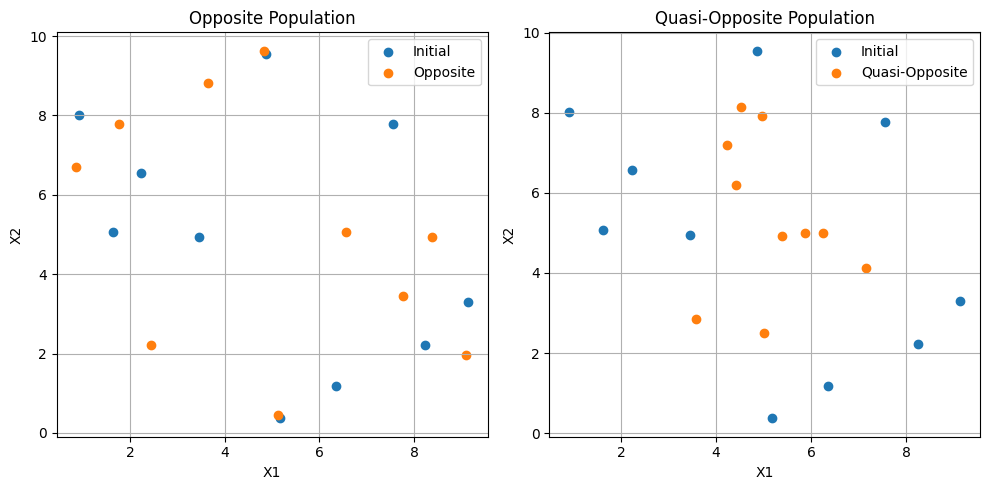

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def test_initial_population_functions():
    # Configurações do teste
    n_population = 10
    n_dimensions = 2
    x_lower = np.array([0, 0])
    x_upper = np.array([10, 10])
    seed = 42

    # Testa população oposta
    pop, pop_opposite = initial_population_01_opposite(
        n_population, n_dimensions, x_lower, x_upper, seed
    )
    print("Initial Population (Opposite):")
    print(np.array(pop))
    print("Opposite Population:")
    print(np.array(pop_opposite))

    # Testa população quasi-oposta
    pop2, pop_quasi = initial_population_01_quasi_opposite(
        n_population, n_dimensions, x_lower, x_upper, seed
    )
    print("\nInitial Population (Quasi-Opposite):")
    print(np.array(pop2))
    print("Quasi-Opposite Population:")
    print(np.array(pop_quasi))

    # Se for 2D, plota os pontos
    if n_dimensions == 2:
        plt.figure(figsize=(10, 5))

        # Oposta
        plt.subplot(1, 2, 1)
        plt.scatter(*np.array(pop).T, label="Initial")
        plt.scatter(*np.array(pop_opposite).T, label="Opposite")
        plt.title("Opposite Population")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.grid(True)

        # Quasi-oposta
        plt.subplot(1, 2, 2)
        plt.scatter(*np.array(pop2).T, label="Initial")
        plt.scatter(*np.array(pop_quasi).T, label="Quasi-Opposite")
        plt.title("Quasi-Opposite Population")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    test_initial_population_functions()
